In [1]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
import tensorflow as tf
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np


def visualize_model(title, epoch_max, model_history):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle(title, fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epoch_list = list(range(1, epoch_max + 1))
    ax1.plot(epoch_list, model_history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, model_history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, epoch_max + 1, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, model_history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, model_history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epoch_max + 1, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")
    plt.savefig(f'{title}.png')


folder_path = r'..\Hand extraction\target_box'
img_height = 200
img_width = 200
batch_size = int(2 ** 7)
EPOCHS = 30

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 800 files belonging to 8 classes.
Using 640 files for training.
Found 800 files belonging to 8 classes.
Using 160 files for validation.


In [3]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one']


In [4]:
tf.get_logger().setLevel('ERROR')
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",
                          input_shape=(img_height,
                                       img_width,
                                       3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

### Basic model

Epoch 1/30
5/5 [==============================] - 4s 224ms/step - loss: 3.1906 - accuracy: 0.1828 - val_loss: 2.0679 - val_accuracy: 0.1562
Epoch 2/30
5/5 [==============================] - 1s 111ms/step - loss: 1.9735 - accuracy: 0.2859 - val_loss: 2.0743 - val_accuracy: 0.0875
Epoch 3/30
5/5 [==============================] - 1s 220ms/step - loss: 1.8551 - accuracy: 0.3391 - val_loss: 2.0423 - val_accuracy: 0.2625
Epoch 4/30
5/5 [==============================] - 2s 448ms/step - loss: 1.4352 - accuracy: 0.6172 - val_loss: 1.9694 - val_accuracy: 0.2875
Epoch 5/30
5/5 [==============================] - 2s 446ms/step - loss: 0.9279 - accuracy: 0.7437 - val_loss: 1.8965 - val_accuracy: 0.3750
Epoch 6/30
5/5 [==============================] - 2s 445ms/step - loss: 0.6696 - accuracy: 0.8078 - val_loss: 1.8934 - val_accuracy: 0.3250
Epoch 7/30
5/5 [==============================] - 2s 448ms/step - loss: 0.4901 - accuracy: 0.8531 - val_loss: 1.8150 - val_accuracy: 0.4187
Epoch 8/30
5/5 [====

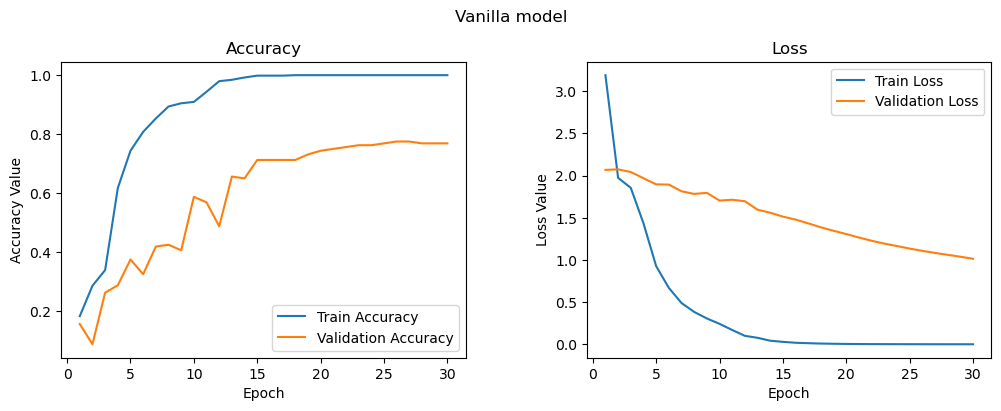

In [6]:
# vanilla_model = keras.models.load_model('Vanilla model.h5')
vanilla_model = Sequential([layers.Rescaling(1. / 255, input_shape=(img_height, img_width, 3)),
                            Conv2D(16, kernel_size=(3, 3), activation='relu'),
                            MaxPooling2D(pool_size=(2, 2)),
                            BatchNormalization(),
                            Conv2D(64, kernel_size=(3, 3), activation='relu'),
                            MaxPooling2D(pool_size=(2, 2)),
                            Conv2D(128, kernel_size=(3, 3), activation='relu'),
                            MaxPooling2D(pool_size=(2, 2)),
                            Flatten(),
                            Dense(num_classes)])

vanilla_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      optimizer='adam',
                      metrics=['accuracy'])

vanilla_history = vanilla_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
)
vanilla_model.save('Vanilla model.h5')
visualize_model('Vanilla model', 30, vanilla_history)

### Regularized model

Epoch 1/30
5/5 [==============================] - 3s 511ms/step - loss: 3.6072 - accuracy: 0.1766 - val_loss: 2.0491 - val_accuracy: 0.1562
Epoch 2/30
5/5 [==============================] - 2s 465ms/step - loss: 2.0413 - accuracy: 0.1937 - val_loss: 2.0747 - val_accuracy: 0.2125
Epoch 3/30
5/5 [==============================] - 3s 524ms/step - loss: 1.9919 - accuracy: 0.2953 - val_loss: 2.0705 - val_accuracy: 0.2875
Epoch 4/30
5/5 [==============================] - 1s 136ms/step - loss: 1.7235 - accuracy: 0.5000 - val_loss: 2.0522 - val_accuracy: 0.1562
Epoch 5/30
5/5 [==============================] - 1s 116ms/step - loss: 1.3513 - accuracy: 0.6094 - val_loss: 2.0460 - val_accuracy: 0.1375
Epoch 6/30
5/5 [==============================] - 1s 121ms/step - loss: 0.9981 - accuracy: 0.7281 - val_loss: 1.9981 - val_accuracy: 0.2125
Epoch 7/30
5/5 [==============================] - 1s 125ms/step - loss: 0.7091 - accuracy: 0.8031 - val_loss: 1.9352 - val_accuracy: 0.2375
Epoch 8/30
5/5 [====

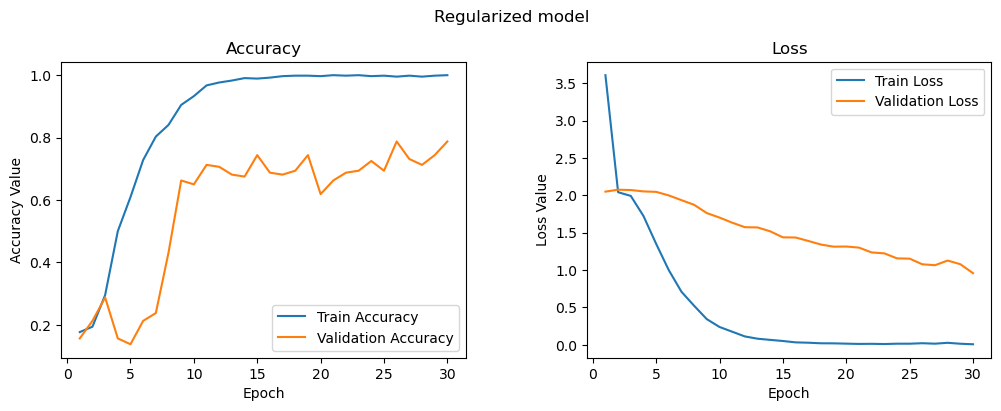

In [7]:
# reg_model = keras.models.load_model('Regularized model.h5')
reg_model = Sequential([layers.Rescaling(1. / 255, input_shape=(img_height, img_width, 3)),
                        Conv2D(16, kernel_size=(3, 3), activation='relu'),
                        MaxPooling2D(pool_size=(2, 2)),
                        BatchNormalization(),
                        Conv2D(64, kernel_size=(3, 3), activation='relu'),
                        MaxPooling2D(pool_size=(2, 2)),
                        Conv2D(128, kernel_size=(3, 3), activation='relu'),
                        MaxPooling2D(pool_size=(2, 2)),
                        Flatten(),
                        Dropout(0.3),
                        Dense(num_classes)])

reg_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer='adam',
                  metrics=['accuracy'])

reg_history = reg_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
)
reg_model.save('Regularized model.h5')
visualize_model('Regularized model', 30, reg_history)

### Image augmentation

Epoch 1/30
5/5 [==============================] - 24s 4s/step - loss: 2.0479 - accuracy: 0.1859 - val_loss: 2.0705 - val_accuracy: 0.2125
Epoch 2/30
5/5 [==============================] - 19s 4s/step - loss: 1.8314 - accuracy: 0.3562 - val_loss: 2.0543 - val_accuracy: 0.1750
Epoch 3/30
5/5 [==============================] - 19s 4s/step - loss: 1.6706 - accuracy: 0.4453 - val_loss: 2.0454 - val_accuracy: 0.2250
Epoch 4/30
5/5 [==============================] - 19s 4s/step - loss: 1.5085 - accuracy: 0.5047 - val_loss: 2.0335 - val_accuracy: 0.2500
Epoch 5/30
5/5 [==============================] - 20s 4s/step - loss: 1.3825 - accuracy: 0.5484 - val_loss: 2.0171 - val_accuracy: 0.2750
Epoch 6/30
5/5 [==============================] - 20s 4s/step - loss: 1.2427 - accuracy: 0.6219 - val_loss: 2.0016 - val_accuracy: 0.3438
Epoch 7/30
5/5 [==============================] - 20s 4s/step - loss: 1.1592 - accuracy: 0.6422 - val_loss: 1.9803 - val_accuracy: 0.2812
Epoch 8/30
5/5 [==================

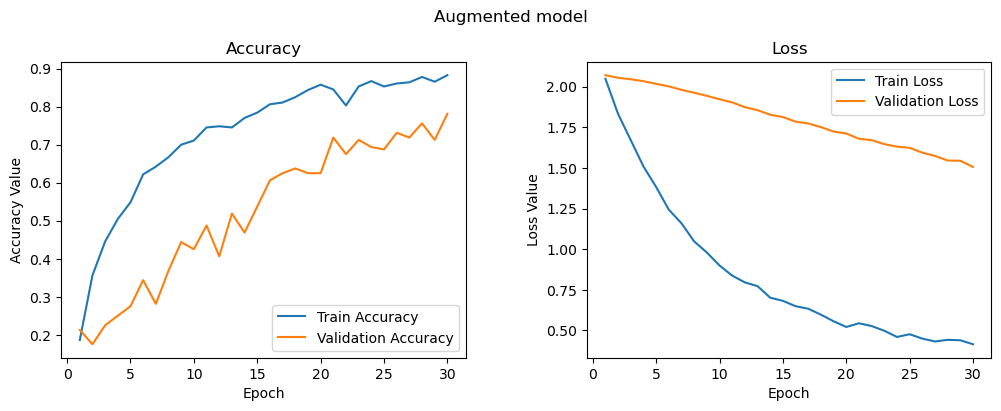

In [8]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",
                          input_shape=(img_height,
                                       img_width,
                                       3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)
# aug_model = keras.models.load_model('Augmented model.h5')
aug_model = Sequential([data_augmentation,
                        layers.Rescaling(1. / 255, input_shape=(img_height, img_width, 3)),
                        Conv2D(16, kernel_size=(3, 3), activation='relu'),
                        MaxPooling2D(pool_size=(2, 2)),
                        BatchNormalization(),
                        Conv2D(64, kernel_size=(3, 3), activation='relu'),
                        MaxPooling2D(pool_size=(2, 2)),
                        Conv2D(128, kernel_size=(3, 3), activation='relu'),
                        MaxPooling2D(pool_size=(2, 2)),
                        Flatten(),
                        Dropout(0.3),
                        Dense(num_classes)])

aug_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=optimizers.Adam(learning_rate=1e-4),
                  metrics=['accuracy'])

aug_history = aug_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
)
aug_model.save('Augmented model.h5')
visualize_model('Augmented model', 30, aug_history)

In [9]:
source_model = keras.models.load_model('Source model.h5')
source_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 99, 99, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)       

In [10]:
# remove top layers from pre-trained model
num_remove = 1
for _ in range(num_remove):
    source_model.pop()

source_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 99, 99, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)       

In [11]:
prediction_layer = tf.keras.layers.Dense(num_classes)
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = source_model(x, training=True)
outputs = prediction_layer(x)
transfered_model = tf.keras.Model(inputs, outputs)

In [12]:
transfered_model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

transfered_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 67712)             83648     
                                                                 
 dense_3 (Dense)             (None, 8)                 541704    
                                                                 
Total params: 625,352
Trainable params: 625,320
Non-trainable params: 32
_________________________________________________________________


In [14]:
transfered_history = transfered_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
)
transfered_model.save('Transfered model.h5')

Epoch 1/30
5/5 [==============================] - 42s 9s/step - loss: 0.6074 - accuracy: 0.8047 - val_loss: 0.6862 - val_accuracy: 0.7812
Epoch 2/30
5/5 [==============================] - 42s 9s/step - loss: 0.5891 - accuracy: 0.8109 - val_loss: 0.8851 - val_accuracy: 0.7125
Epoch 3/30
5/5 [==============================] - 42s 9s/step - loss: 0.5125 - accuracy: 0.8391 - val_loss: 0.7664 - val_accuracy: 0.7500
Epoch 4/30
5/5 [==============================] - 42s 9s/step - loss: 0.5691 - accuracy: 0.8188 - val_loss: 0.8511 - val_accuracy: 0.7188
Epoch 5/30
5/5 [==============================] - 42s 9s/step - loss: 0.5330 - accuracy: 0.8344 - val_loss: 0.6808 - val_accuracy: 0.7750
Epoch 6/30
5/5 [==============================] - 42s 9s/step - loss: 0.5396 - accuracy: 0.8297 - val_loss: 0.8731 - val_accuracy: 0.7188
Epoch 7/30
5/5 [==============================] - 42s 9s/step - loss: 0.5143 - accuracy: 0.8375 - val_loss: 0.7449 - val_accuracy: 0.7250
Epoch 8/30
5/5 [==================

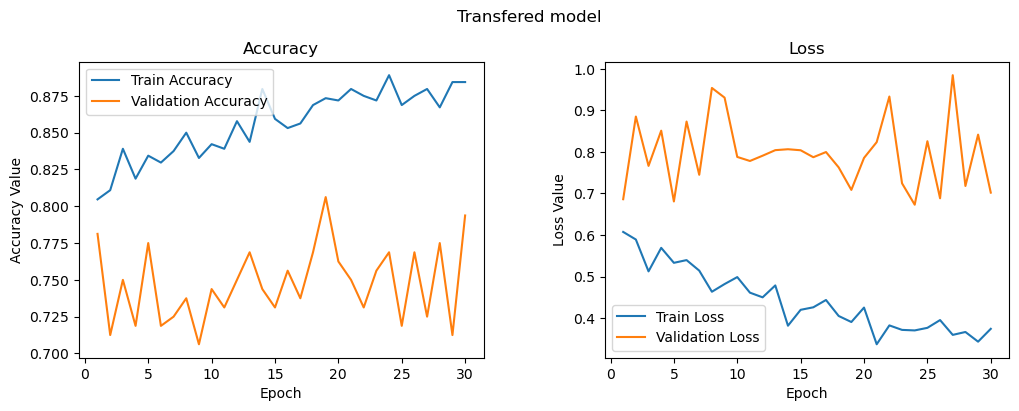

In [15]:
visualize_model('Transfered model', 30, transfered_history)